# 01 Fundamental Neural Network

## Neural Network
Neural network atau yang biasa dikenal dengan jaringan saraf buatan seperti namanya meniru bagaimana jaringan saraf otak bekerja. neural network terdiri dari beberapa layer yaitu: input layer, hidden layer (bisa juga tidak ada), output layer. input layer merupakan layer tempat data diinput, hidden layer merupakan tempat dimana layer melakukan pembelajar lebih dalam, dan output layer merupakan hasil dari pembelajaran.
pembelajaran diawali dengan menggunakan nilai random, setelah sampai di output akan dilakukan evaluasi. hasil evaluasi tersebut akan mengupdate nilai random yang ditetapkan sebelumnya [(liat penjelasan yang telah dibuat)](https://docs.google.com/document/d/1OvAB9ZYlezdt4o8sAUBWco20425miMo2I5xe0oYKT4c/edit?usp=drive_link).

Neural network memiliki banyak variasinya sesuai kasus yang akan diselesaikan. hal ini dikarenakan tidak semua kasus dapat diselesaikan dengan hanya neural network biasa saja. contohnya:
* CNN untuk mengklasifikasikan gambar
* RNN untuk mengklasifikasikan tulisan
* LSTM juga untuk kasus tulisan (NLP)
* masih banyak lagi.

AI memerlukan banyak experiment untuk menemukan model yang tepat untuk menyelesaikan kasusnya. juga banyak hal yang dapat dilakukan oleh AI, diantaranya:
* Klasifikasi
* Klustering
* Prediksi
* Asosiasi (jarang)
* dan lain sebagainya.

Mari langsung peraktik aja lah, hehe...



## Regresi
regersi merupakan salah satu bagian dari prediksi. regresi memiliki rentang output yang beruba numerik

In [ ]:
import tensorflow as tf
import datetime

print("versi tensorflow :",tf.__version__)
# print("tanggal :",datetime.datetime.today())

versi tensorflow : 2.13.0
tanggal : 2023-09-12 08:17:41.970704


### import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## let's get started

In [ ]:
X = tf.constant(np.arange(1,20), dtype=tf.int32)
X

<tf.Tensor: shape=(19,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int32)>

In [ ]:
y = tf.multiply(X, 2)
y

<tf.Tensor: shape=(19,), dtype=int32, numpy=
array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38], dtype=int32)>

In [ ]:
X.numpy()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int32)

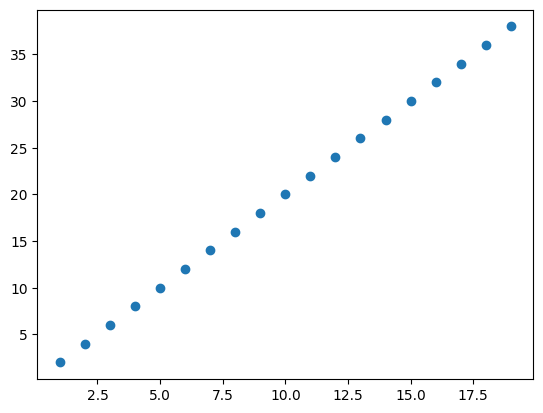

In [ ]:
plt.scatter(X, y)

In [ ]:
X[0].shape, X[0]

(TensorShape([]), <tf.Tensor: shape=(), dtype=int32, numpy=1>)

**Berikut adalah contoh kasus regresi:**

![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)

*Pada contoh kasus diatas, nilai input(dependent) dapat memiliki banyak variable dan output merupakan bilangan numerik. machine learning berusaha mencari pola untuk mencapai target yang diinginkan dalam hal ini adalah output.*

## Langkah-langkah dalam membuat model di tensorFlow
Fundamental untuk membuat tensorflow:
1. **Membuat model** : membuat layer model (menggunakan [Functional](https://www.tensorflow.org/guide/keras/functional) atau [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) atau dapat juga menggunakan layar yang sudah ada (transfer learning)
2. **compaling model** : membuat bagaimana performa di ukur (loss, metrics) dan bagaimana performa itu ditingkatkan (optimizer).
3. **Fitting model** : memberikan model kesempatan untuk belajar.

Tensorflow 2.7.0+ tidak memungkinkan untuk melakukan pelebaran dimensi dari `(ukuran_batch,)` ke `(ukuran_batch,1)`, maka diperlukan perlebaran dimensi menggunakan `tf.expand_dims(input_data, axis= -1)`


In [ ]:
X, y

(<tf.Tensor: shape=(19,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19], dtype=int32)>,
 <tf.Tensor: shape=(19,), dtype=int32, numpy=
 array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38], dtype=int32)>)

In [ ]:
# random seed
tf.random.set_seed(42)

# buat model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# buat compile
model.compile(loss = tf.keras.losses.mae, # menggunakan loses mae
              optimizer = tf.keras.optimizers.SGD(), # menggunakan optimzier stochastic gradient discent
              metrics=["mae"])


In [ ]:
# fit model
model.fit(X, y, epochs=10)

Epoch 1/10


ValueError: ignored

In [ ]:
# model fit dengan expand dimension
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 329ms/step - loss: 15.3243 - mae: 15.3243
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 14.3143 - mae: 14.3143
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 13.3043 - mae: 13.3043
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 12.2943 - mae: 12.2943
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 11.2843 - mae: 11.2843
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 10.2743 - mae: 10.2743
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 9.2643 - mae: 9.2643
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 8.2543 - mae: 8.2543
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 7.2443 - mae: 7.2443
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 6.2343 - mae: 6.2343


In [ ]:
X, y

(<tf.Tensor: shape=(19,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19], dtype=int32)>,
 <tf.Tensor: shape=(19,), dtype=int32, numpy=
 array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38], dtype=int32)>)

## peredict model

In [ ]:
model.predict([20])

1/1 [==============================] - 0s 143ms/step


array([[29.451359]], dtype=float32)

Terdapat beberap faktor yang menentukan pembelajaran dari neural network, diantaranya adalah:
* jumlah hidden layer (deeper layer)
* jumlah unit dari setiap hidden layer (wider layer)
* fungsi aktifasi pada setiap layer
* fungsi optimasi
* learning rate
* fitting lebih banyak data
* fitting lebih lama (epochs)
* dan mungkin masih ada lagi

dari list diatas dinamakan [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)). Untuk mencari terdapat referensi untuk [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).

> [**Keras**](https://keras.io/) merupakan desain API agar pembuatan deep learning dilakukan dengan mudah. Keras sudah terintegrasi dengan tensorflow



In [ ]:
# atau dapat menggunakan cara ini untuk pembuatan model
tf.random.set_seed(42)

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss= tf.keras.losses.mae,
              optimizer= tf.optimizers.SGD(),
              metrics= ["mae"])

In [ ]:
model2.fit(tf.expand_dims(X, axis= -1), y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 0s 455ms/step - loss: 12.6857 - mae: 12.6857
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 11.6757 - mae: 11.6757
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 10.6657 - mae: 10.6657
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 9.6557 - mae: 9.6557
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 8.6457 - mae: 8.6457
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 7.6357 - mae: 7.6357
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 6.6257 - mae: 6.6257
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 5.6157 - mae: 5.6157
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 4.6057 - mae: 4.6057
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 3.5957 - mae: 3.5957


In [ ]:
model2.predict([20])

1/1 [==============================] - 0s 195ms/step


array([[34.7286]], dtype=float32)

## Evaluasi model
Untuk mengevaluasi model, kutipan berikuat akan menjadi acuan.
> A typical workflow you'll go through when building neural networks is:
```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```
The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

> When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

>This is because you're probably better looking at something (doing) than you are thinking about something.

> It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Langkah-langkah diatas adalah cara yang optimal untuk melakukan experiment dari model sehingga mendapatkan model yang terbaik.

## Explore
Diatas adalah cara membuat model dengan baik. Selebihnya eksplore lebih lanjut seperti save dan load model dan lain sebagainya.